Accuracy: 0.9666666666666667
Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
ROC AUC (macro avg): 1.0
ROC AUC (micro avg): 0.9994444444444445
F1 Score (macro avg): 0.9645191409897292
F1 Score (class 0): 1.0
F1 Score (class 1): 0.9523809523809523
F1 Score (class 2): 0.9411764705882353


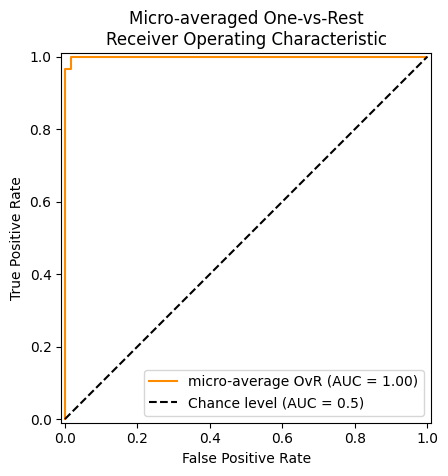

In [2]:
from regex import X
from SFXGBoost.Model import SFXGBoost
import pickle
import pandas as pd
import numpy as np
from SFXGBoost.dataset.datasetRetrieval import getDataBase
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

# from federboost import NUM_CLIENTS

POSSIBLE_PATHS = ["e:\\oneDrive\\UOB\\Federated_XGBoost_Python-main\\data\\"]
# X_train, y_train, X_test, y_test, fName, X_shadow, y_shadow = getDataBase('healthcare', POSSIBLE_PATHS, False, 10_000)()

NUM_CLIENTS = 2

bst_clients = []

for i in range(NUM_CLIENTS):
    i += 1
    bst:SFXGBoost = pickle.load(open(f"./Saves/model_iris_{i}.pkl", 'rb'))
    bst_clients.append(bst)

X_train = np.concatenate((bst_clients[0].X_train, bst_clients[1].X_train))
X_test = np.concatenate((bst_clients[0].X_test, bst_clients[1].X_test))
y_train = np.concatenate((bst_clients[0].y_train, bst_clients[1].y_train))
y_test = np.concatenate((bst_clients[0].y_test, bst_clients[1].y_test))


n_classes = y_test.shape[1]
y_test_labels = np.argmax(y_test, axis=1)

y_pred = bst.predict(X_test)
y_pred_prab = bst.predict_proba(X_test)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='macro')
print(f"ROC AUC (macro avg): {roc_auc}")

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='micro')
print(f"ROC AUC (micro avg): {roc_auc}")

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred, average='macro')
print(f"F1 Score (macro avg): {f1}")

# Calculate F1 score for each class
f1_per_class = f1_score(y_test_labels, y_pred, average=None)
for i, score in enumerate(f1_per_class):
    print(f"F1 Score (class {i}): {score}")

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred_prab.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)